# Predicting Usage of a Video Game Research Server

## From individual
covers loading data, wrangling and cleaning data, summary of dataset, and exploratory visuals (will need to be changed a bit).

Q: Can total time played predict whether or not they are subscribed to a newsletter

### **Data Description for players.csv:**

**Number of observations**: 196

**Number of variables**: 7

**Names and types of variables:**

- experience: Character (chr)
- subscribe: Logical (lgl)
- hashedEmail: Character (chr)
- played_hours: Double (dbl)
- name: Character (chr)
- gender: Character (chr)
- Age: Double (dbl)

**What does each variable mean?**

- experience: The player's experience level in the game.
- subscribe: Whether or not the player is subscribed to a gaming newsletter.
- hashedEmail: The player's email.
- played_hours: How many hours the player played for.
- name: The real name of the player.
- gender: The gender identity of the player.
- Age: The age of the player.

**Issues with the data**

An issue with the dataset is that there are NA's present. The summary() function was used to create a summary of the data and it was determined that there were 2 NA values in the Age column. These NA values will make it difficult to perform summary statistics on the data set or use it for classification; thus, they must be removed.

**Issues with how the data was collected**

Much of the data appears to be self reported so it is difficult to determine the accuracy of the collected demographic information. One variable in particular that has a large potential to be innacurate is experience. Minecraft does not have a ranking system for players, so the experience levels such as Pro, Veteran, Amateur, etc. are all self reported by the players. As a result, there is potential for their experience level to be exagerated. The other variables also have potential to be innacurately reported as players could potentially lie about their age or input a gender that they do not actually identify with.

In [2]:
library(tidyverse) 
#This loads in the tidyverse package. This is the main package used in R to help tidy and present data.
#It is neccessary to have this package downloaded for the functions used in this file to run.
set.seed(42)
#This seed makes the project reproducible.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
players <- read_csv("https://raw.githubusercontent.com/pwelters/dsci_project_data/refs/heads/main/players.csv")
#Now the players.csv file is being read into R from a public GitHub repository where it has been downloaded and uploaded to. 
#The dataset will now be visible in this file.
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

### **Question**

**Can played hours accurately predict whether or not a player is subscribed to a gaming newsletter?**

This question will be addressed using data from the players.csv dataset. I plan to select the data from the subscribe and played_hours columns and use these observations to plot several visualizations that will help to display the data, as well as perform a classification using these observations to determine if played_hours and Age can predict whether or not a player will subscribe to a gaming newsletter with accuracy.

**Tidying Data**

The data from the players dataset is already fairly tidy so it is not neccessary to do much wrangling. However, the Age column has NA values which will make it impossible to compute the mean. To tidy the data, an object called tidy_players was created to remove the NA values from the players dataset. The tidy_players object was then summarized and the mean values for the played_hours and Age columns were computed.

In [4]:
tidy_players <- drop_na(players)
#drop_na is used to remove the NA values from the players dataset in order to calculate the mean for the quantitative variables.

In [5]:
players_summary <- tidy_players  |>
summarize(played_hours_mean = mean(played_hours))

players_summary

played_hours_mean
<dbl>
5.904639


**Mean value for played_hours**: 5.904 (hours)

### **Visualizations**

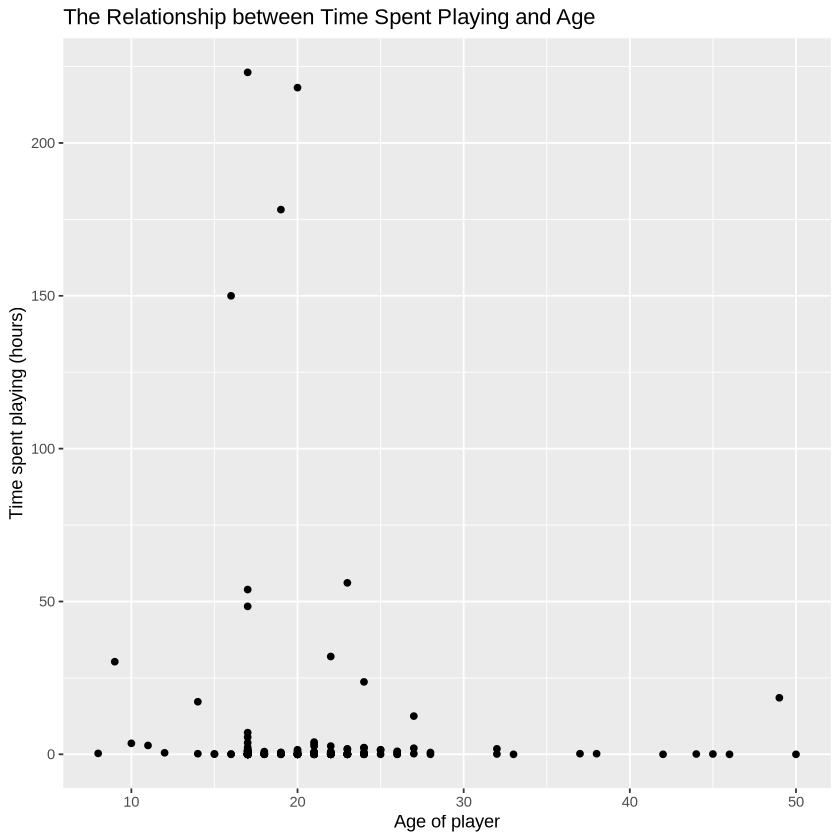

In [6]:
plot_1 <- tidy_players |>
ggplot(aes (x = Age, y = played_hours)) +
geom_point() +
labs(x = "Age of player", y = "Time spent playing (hours)") +
ggtitle("The Relationship between Time Spent Playing and Age")

plot_1

This plot of the relationship between time spent playing and age aims to determine whether or not there is an obvious relationship between the played_hours and Age variables. The graph does not provide evidence of a trend.

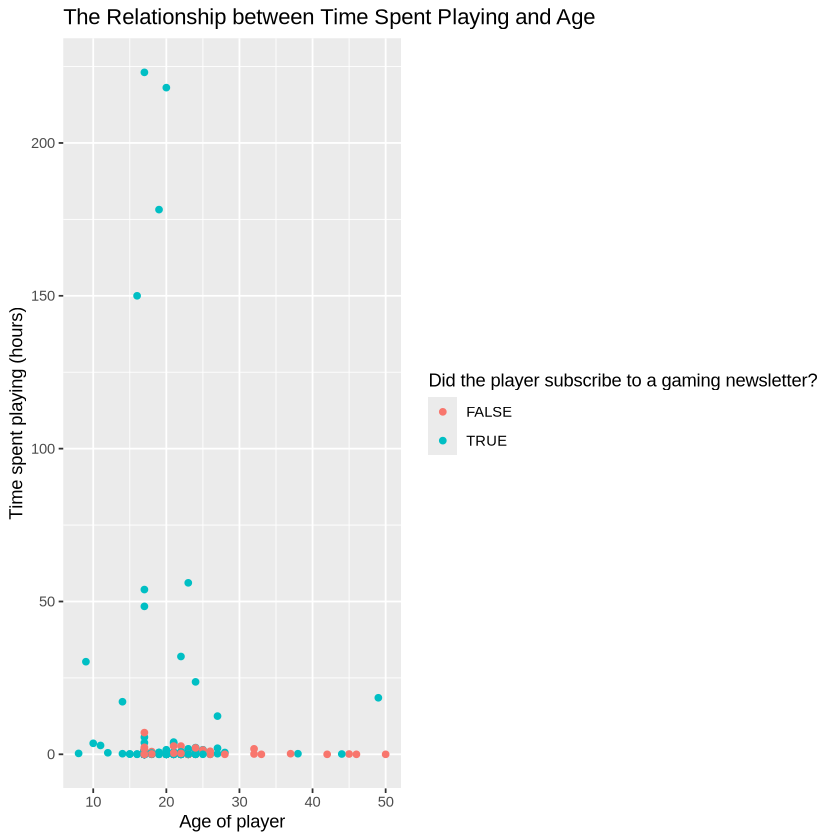

In [7]:
plot_2 <- tidy_players |>
ggplot(aes( x = Age, y = played_hours))+
geom_point(aes(color = subscribe)) +
labs( x = "Age of player", y = "Time spent playing (hours)", color = "Did the player subscribe to a gaming newsletter?")+
ggtitle("The Relationship between Time Spent Playing and Age")

plot_2

This second plot was created to display the same data as the first plot, except this time each individual player is also labelled with whether or not they subscribe to a gaming newsletter. If the player does not subscribe to a newsletter, their subscribe value is FALSE and their point on the scatterplot is coloured orange. If the player does subscribe to a newsletter, their subscribe value is TRUE and their point on the scatterplot is coloured blue. This plot reveals much more about the dataset and provides valuable information that may be helpful in answering the question, "Can played hours and age predict whether or not a player is subscribed to a gaming newsletter?"

There appears to be a relationship between the subscribe variable and Age and played_hours. Newsletter subscriptions and age seem to have a negative relationship as while age increases, less points on the graph show the subscribe value to be TRUE (i.e. less points are blue in colour). Most of the subscribers appear to be within ages 10 to 30. Newsletter subscriptions and time spent playing appear to have a positive relationship, as more blue points appear as time spent playing increases.

These relationships give evidence to suggest that the Age and played_hours variables could be used to predict whether subscribe has a TRUE or FALSE value, and therefore predict whether or not a player is subscribed to a gaming newsletter.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


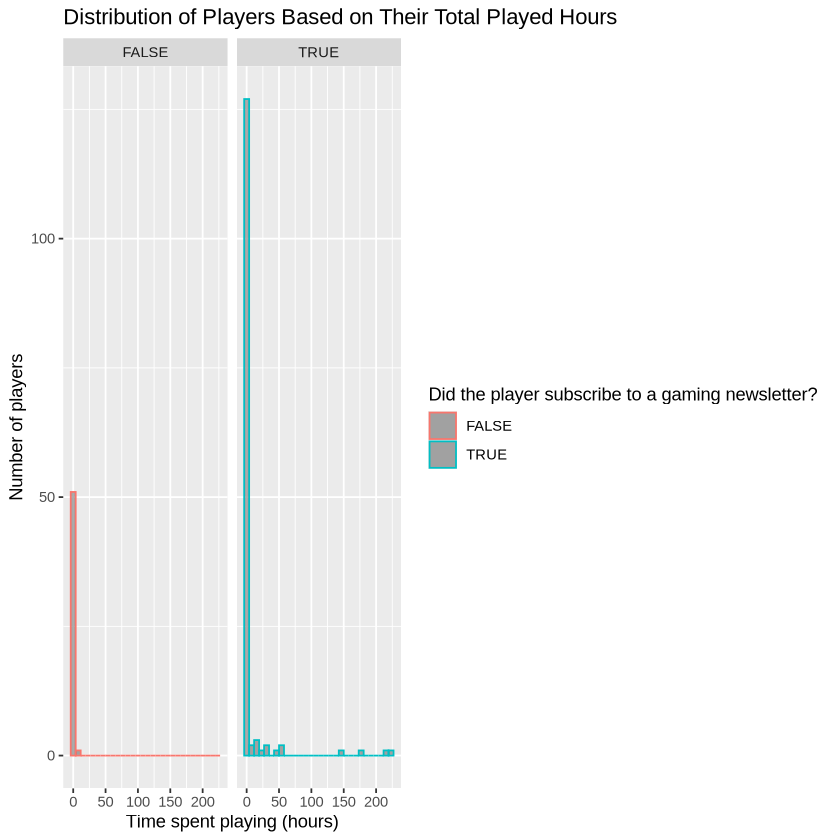

In [8]:
plot_3 <- tidy_players |>
    ggplot(aes( x = played_hours))+
    geom_histogram(alpha=0.5, position = "identity", aes(color = subscribe)) +
    labs( x = "Time spent playing (hours)", y = "Number of players", color = "Did the player subscribe to a gaming newsletter?")+
    ggtitle("Distribution of Players Based on Their Total Played Hours") +
facet_grid(.~subscribe)

plot_3

### **Method**

To answer the research question, a classifier will be constructed and it will be determined if it is more accurate than simply guessing whether or not someone is subscribed to a newsletter. We can see from the summary of the dataset that there were 144 TRUE responses and 52 false responses. If one were to guess TRUE for every response, they would have an accuracy of 144/196 or 73%. For this classifier to be useful and to prove that age and time played can predict whether or not an individual subscribes to a newsletter, it must have an accuracy greater than 73%.

This method is appropriate as it both creates a classifier to answer one of the questions of interest, and determines whether or not the answers are accurate enough to warrant the use of the classifier.

Some neccessary assumptions are that the players accurately reported their age and that the dataset is large enough to effectively train and test the classifier to the point that it can be trusted to accurately predict the class of an observation for which class is unknown.

A potential limitation of this method is the gaps in collected data for the predictor variables. The majority of the data collected is from players aged 10 to 30 who played under 50 hours. The classifier could potentially have trouble predicting a class for data that falls outside this range as it will not encounter such values as often while being trained.

A classification model was selected for this project as whether or not someone is subscribed to a newsletter is a class variable rather than a numerical value.

To build the classifier, the data being analyzed must first be split into a training set and a test set. The data will be split with 75% of it going into the training set, and 25% into the test set. The training set is used to construct the classifier, which is then used to predict the class of different observations from the test set. Cross validation will be used to select the most accurate k value based on the dataset. Then, the accuracy of the classifier must be tested. To do so, a confusion matrix is generated which provides the values for the total number of correct classifications as well as the total number of all classifications. The metrics of this confusion matrix will then be determined and its accuracy will be calculated. This will give us the accuracy of the classifier. This accuracy value can be compared with the accuracy of just guessing (73%), and it will be determined whether or not the classifier is accurate enough to be deemed useful.

## Data Analysis

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



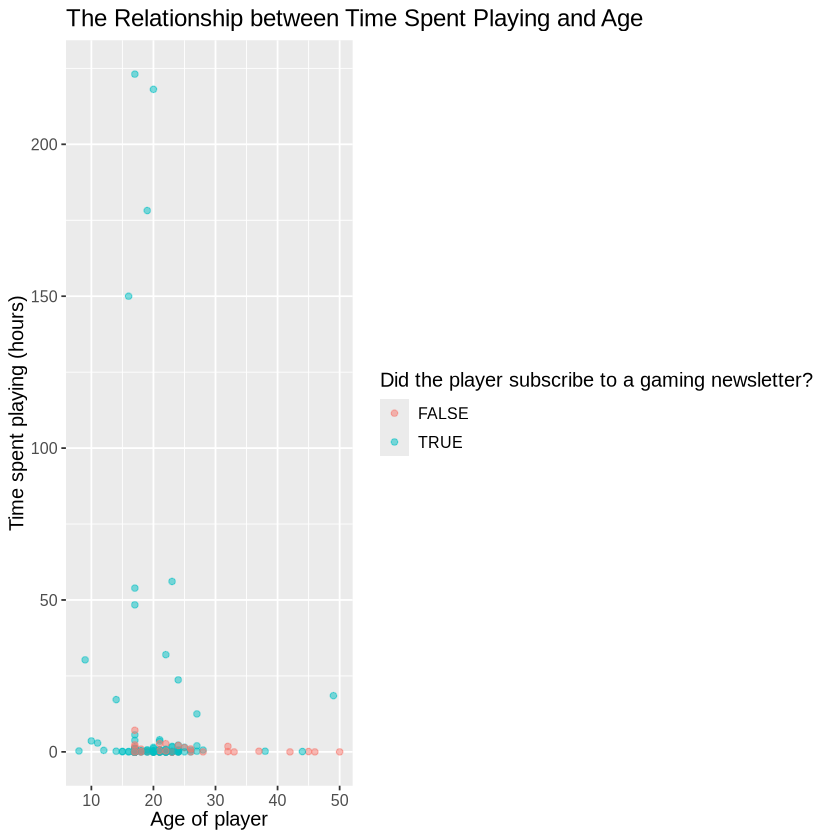

In [9]:
library(tidymodels)

# set the seed
set.seed(1)

# load data
tidy_players <- tidy_players |>
    mutate(subscribe = as_factor(subscribe))

# create scatter plot of age versus played hours,
# labeling the points be subscribe class

time_age_plot <- tidy_players |>
    ggplot(aes( x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.5) +
    labs( x = "Age of player", y = "Time spent playing (hours)", color = "Did the player subscribe to a gaming newsletter?") +
    ggtitle("The Relationship between Time Spent Playing and Age") +
    theme(text = element_text(size = 12))

time_age_plot

In [10]:
# Ratio of subscribed and unsubscribed players to ensure that the proportion is maintained when splitting into training and testing groups
og_proportions <- tidy_players |>
    group_by(subscribe) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(tidy_players))

og_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,52,26.80412
TRUE,142,73.19588


In [11]:
subscribe_split <- initial_split(tidy_players, prop = 0.75, strata = subscribe)
subscribe_train <- training(subscribe_split)
subscribe_test <- testing(subscribe_split)

In [12]:
glimpse(subscribe_train)

glimpse(subscribe_test)

Rows: 145
Columns: 7
$ experience   <chr> "Veteran", "Amateur", "Amateur", "Veteran", "Amateur", "V…
$ subscribe    <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ hashedEmail  <chr> "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118e…
$ played_hours <dbl> 0.0, 0.0, 0.1, 0.1, 0.0, 1.4, 0.0, 0.0, 0.0, 0.2, 0.0, 0.…
$ name         <chr> "Blake", "Quinlan", "Anastasia", "Vivienne", "Vasco", "Ai…
$ gender       <chr> "Male", "Male", "Female", "Male", "Prefer not to say", "P…
$ Age          <dbl> 17, 22, 17, 18, 33, 25, 24, 23, 42, 37, 28, 17, 17, 26, 2…
Rows: 49
Columns: 7
$ experience   <chr> "Amateur", "Regular", "Amateur", "Regular", "Amateur", "V…
$ subscribe    <fct> TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TR…
$ hashedEmail  <chr> "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff…
$ played_hours <dbl> 0.7, 0.1, 0.0, 0.0, 0.0, 0.0, 1.6, 1.5, 0.2, 0.3, 0.0, 0.…
$ name         <chr> "Flora", "Kylie", "Adrian", "Luna", "Emerson", "Nyla", "L…

In [13]:
subscribe_train_proportions <- subscribe_train |>
                      group_by(subscribe) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(subscribe_train))

subscribe_test_proportions <- subscribe_test |>
                      group_by(subscribe) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(subscribe_test))

subscribe_train_proportions
subscribe_test_proportions

#we can confirm that the proportions are preserved

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,39,26.89655
TRUE,106,73.10345


subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,13,26.53061
TRUE,36,73.46939


In [14]:
subscribe_recipe <- recipe(subscribe ~ Age + played_hours, data = subscribe_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(subscribe_recipe) |>
    add_model(knn_spec) |>
    fit(data = subscribe_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3931034
Best kernel: rectangular
Best k: 5

In [15]:
subscribe_test_predictions <- predict(knn_fit, subscribe_test) |>
    bind_cols(subscribe_test)

head(subscribe_test_predictions)

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
TRUE,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
TRUE,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
FALSE,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
TRUE,Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
TRUE,Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
TRUE,Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22


### Evaluating Performance

In [16]:
subscribe_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6122449


In [17]:
subscribe_test_predictions |> pull(subscribe) |> levels()

[1] "FALSE" "TRUE"

In [18]:
subscribe_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.35


In [19]:
subscribe_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5384615


In [20]:
confusion <- subscribe_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     7   13
     TRUE      6   23

In [21]:
library(rsample)
subscribe_vfold <- vfold_cv(data = subscribe_train, v = 5, strata = "subscribe")
subscribe_vfold

Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 115, 116, 117

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NUL